In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import os.path as osp
import numpy as np
from spinup.utils.plot import get_datasets, get_all_datasets, plot_data

In [11]:
datasets, configs = get_all_datasets(['/Users/ppiech/openaigym/spindata/pendulum-bin_goal/'])

# Show a sample of the data
pd.concat(datasets, ignore_index=True)

Plotting from...

/Users/ppiech/openaigym/spindata/pendulum-bin_goal/



,Epoch,AverageEpRet,StdEpRet,EpLen,GoalPathLen,StabilityReward,StabilityActionError,StabilityGoalError,ForwardPredictionError,GoalsStepReward,...,ActionsEntropy,ActionsAdvantageMean,ActionsKL,ActionsStopIter,LossActionInverse,LossGoalInverse,Unit,Condition1,Condition2,Performance
0,0,-1483.07620,222.75557,200.0,1.021101,0.545078,0.746323,0.298984,1.262568,0.544284,...,0.934264,-6.521015,0.001374,79.0,0.700175,0.288033,0,no_stability_in_goal_pendulum-v0_0-01,no_stability_in_goal_pendulum-v0_0-01-14,-1483.07620
1,1,-1380.99280,150.44089,200.0,1.021321,0.633183,0.346348,0.294486,1.283901,0.633068,...,0.930412,0.426362,0.006732,79.0,0.503348,0.277384,0,no_stability_in_goal_pendulum-v0_0-01,no_stability_in_goal_pendulum-v0_0-01-14,-1380.99280
2,2,-1509.94730,158.34723,200.0,1.015151,0.611200,0.310665,0.330859,0.976294,0.611096,...,0.904189,-0.226265,0.007873,79.0,0.498047,0.265836,0,no_stability_in_goal_pendulum-v0_0-01,no_stability_in_goal_pendulum-v0_0-01-14,-1509.94730
3,3,-1516.18460,267.39932,200.0,1.020249,0.611201,0.313088,0.350339,0.776739,0.611305,...,0.873563,0.402713,0.000568,79.0,0.479127,0.260861,0,no_stability_in_goal_pendulum-v0_0-01,no_stability_in_goal_pendulum-v0_0-01-14,-1516.18460
4,4,-1512.93230,260.98602,200.0,1.023025,0.617381,0.189648,0.344740,0.678732,0.616651,...,0.905639,0.576134,0.004857,79.0,0.467205,0.260236,0,no_stability_in_goal_pendulum-v0_0-01,no_stability_in_goal_pendulum-v0_0-01-14,-1512.93230
5,5,-1542.03450,236.40903,200.0,1.020886,0.620501,0.271431,0.350833,0.547852,0.620438,...,0.853395,0.606783,0.012676,79.0,0.415081,0.255408,0,no_stability_in_goal_pendulum-v0_0-01,no_stability_in_goal_pendulum-v0_0-01-14,-1542.03450
6,6,-1459.77770,230.19556,200.0,1.030932,0.608293,0.359587,0.363730,0.564350,0.608227,...,0.886885,0.527253,0.008750,79.0,0.433331,0.254799,0,no_stability_in_goal_pendulum-v0_0-01,no_stability_in_goal_pendulum-v0_0-01-14,-1459.77770
7,7,-1424.96690,221.31638,200.0,1.044496,0.626863,0.290748,0.337051,0.540015,0.626852,...,0.902157,0.585486,0.004387,79.0,0.433701,0.251396,0,no_stability_in_goal_pendulum-v0_0-01,no_stability_in_goal_pendulum-v0_0-01-14,-1424.96690
8,8,-1614.23570,175.50390,200.0,1.030528,0.624227,0.177996,0.357181,0.325516,0.624269,...,0.888824,0.502426,0.018816,6.0,0.431848,0.249217,0,no_stability_in_goal_pendulum-v0_0-01,no_stability_in_goal_pendulum-v0_0-01-14,-1614.23570
9,9,-1452.40950,215.38031,200.0,1.056996,0.634848,0.177995,0.330417,0.347355,0.634927,...,0.844360,0.559385,0.003253,79.0,0.406182,0.245924,0,no_stability_in_goal_pendulum-v0_0-01,no_stability_in_goal_pendulum-v0_0-01-14,-1452.40950


In [12]:
# Show table of parameters used in the experiment, used as guide to graph legends

def config_values(config, paths):
    values = []
    for path in paths:
        value = config
        for name in path.split(':'):
            value = value[name]
        values.append(value)
    return values

columns = ['exp_name', 
           'steps_per_epoch',
#           'use_reward_discount',
#           'goal_octaves', 
#            'goal_discount_rate', 
#           'no_step_reward', 
#           'finish_action_path_on_new_goal', 
#            'ac_kwargs:hidden_sizes', 
#            'ac_kwargs:activation', 
#            'inverse_kwargs:hidden_sizes', 
#            'inverse_kwargs:activation', 
#            'inverse_kwargs:goals_output_activation'
          ]

data = list(map(lambda config: config_values(config, columns), configs))
df = pd.DataFrame(data=data, columns=columns)
df.drop_duplicates()

,exp_name,steps_per_epoch
0,no_stability_in_goal_pendulum-v0_0-01,2400
1,bin-goal-entropy_pendulum-v0,4800
11,bin-goal_pendulum-v0,4800


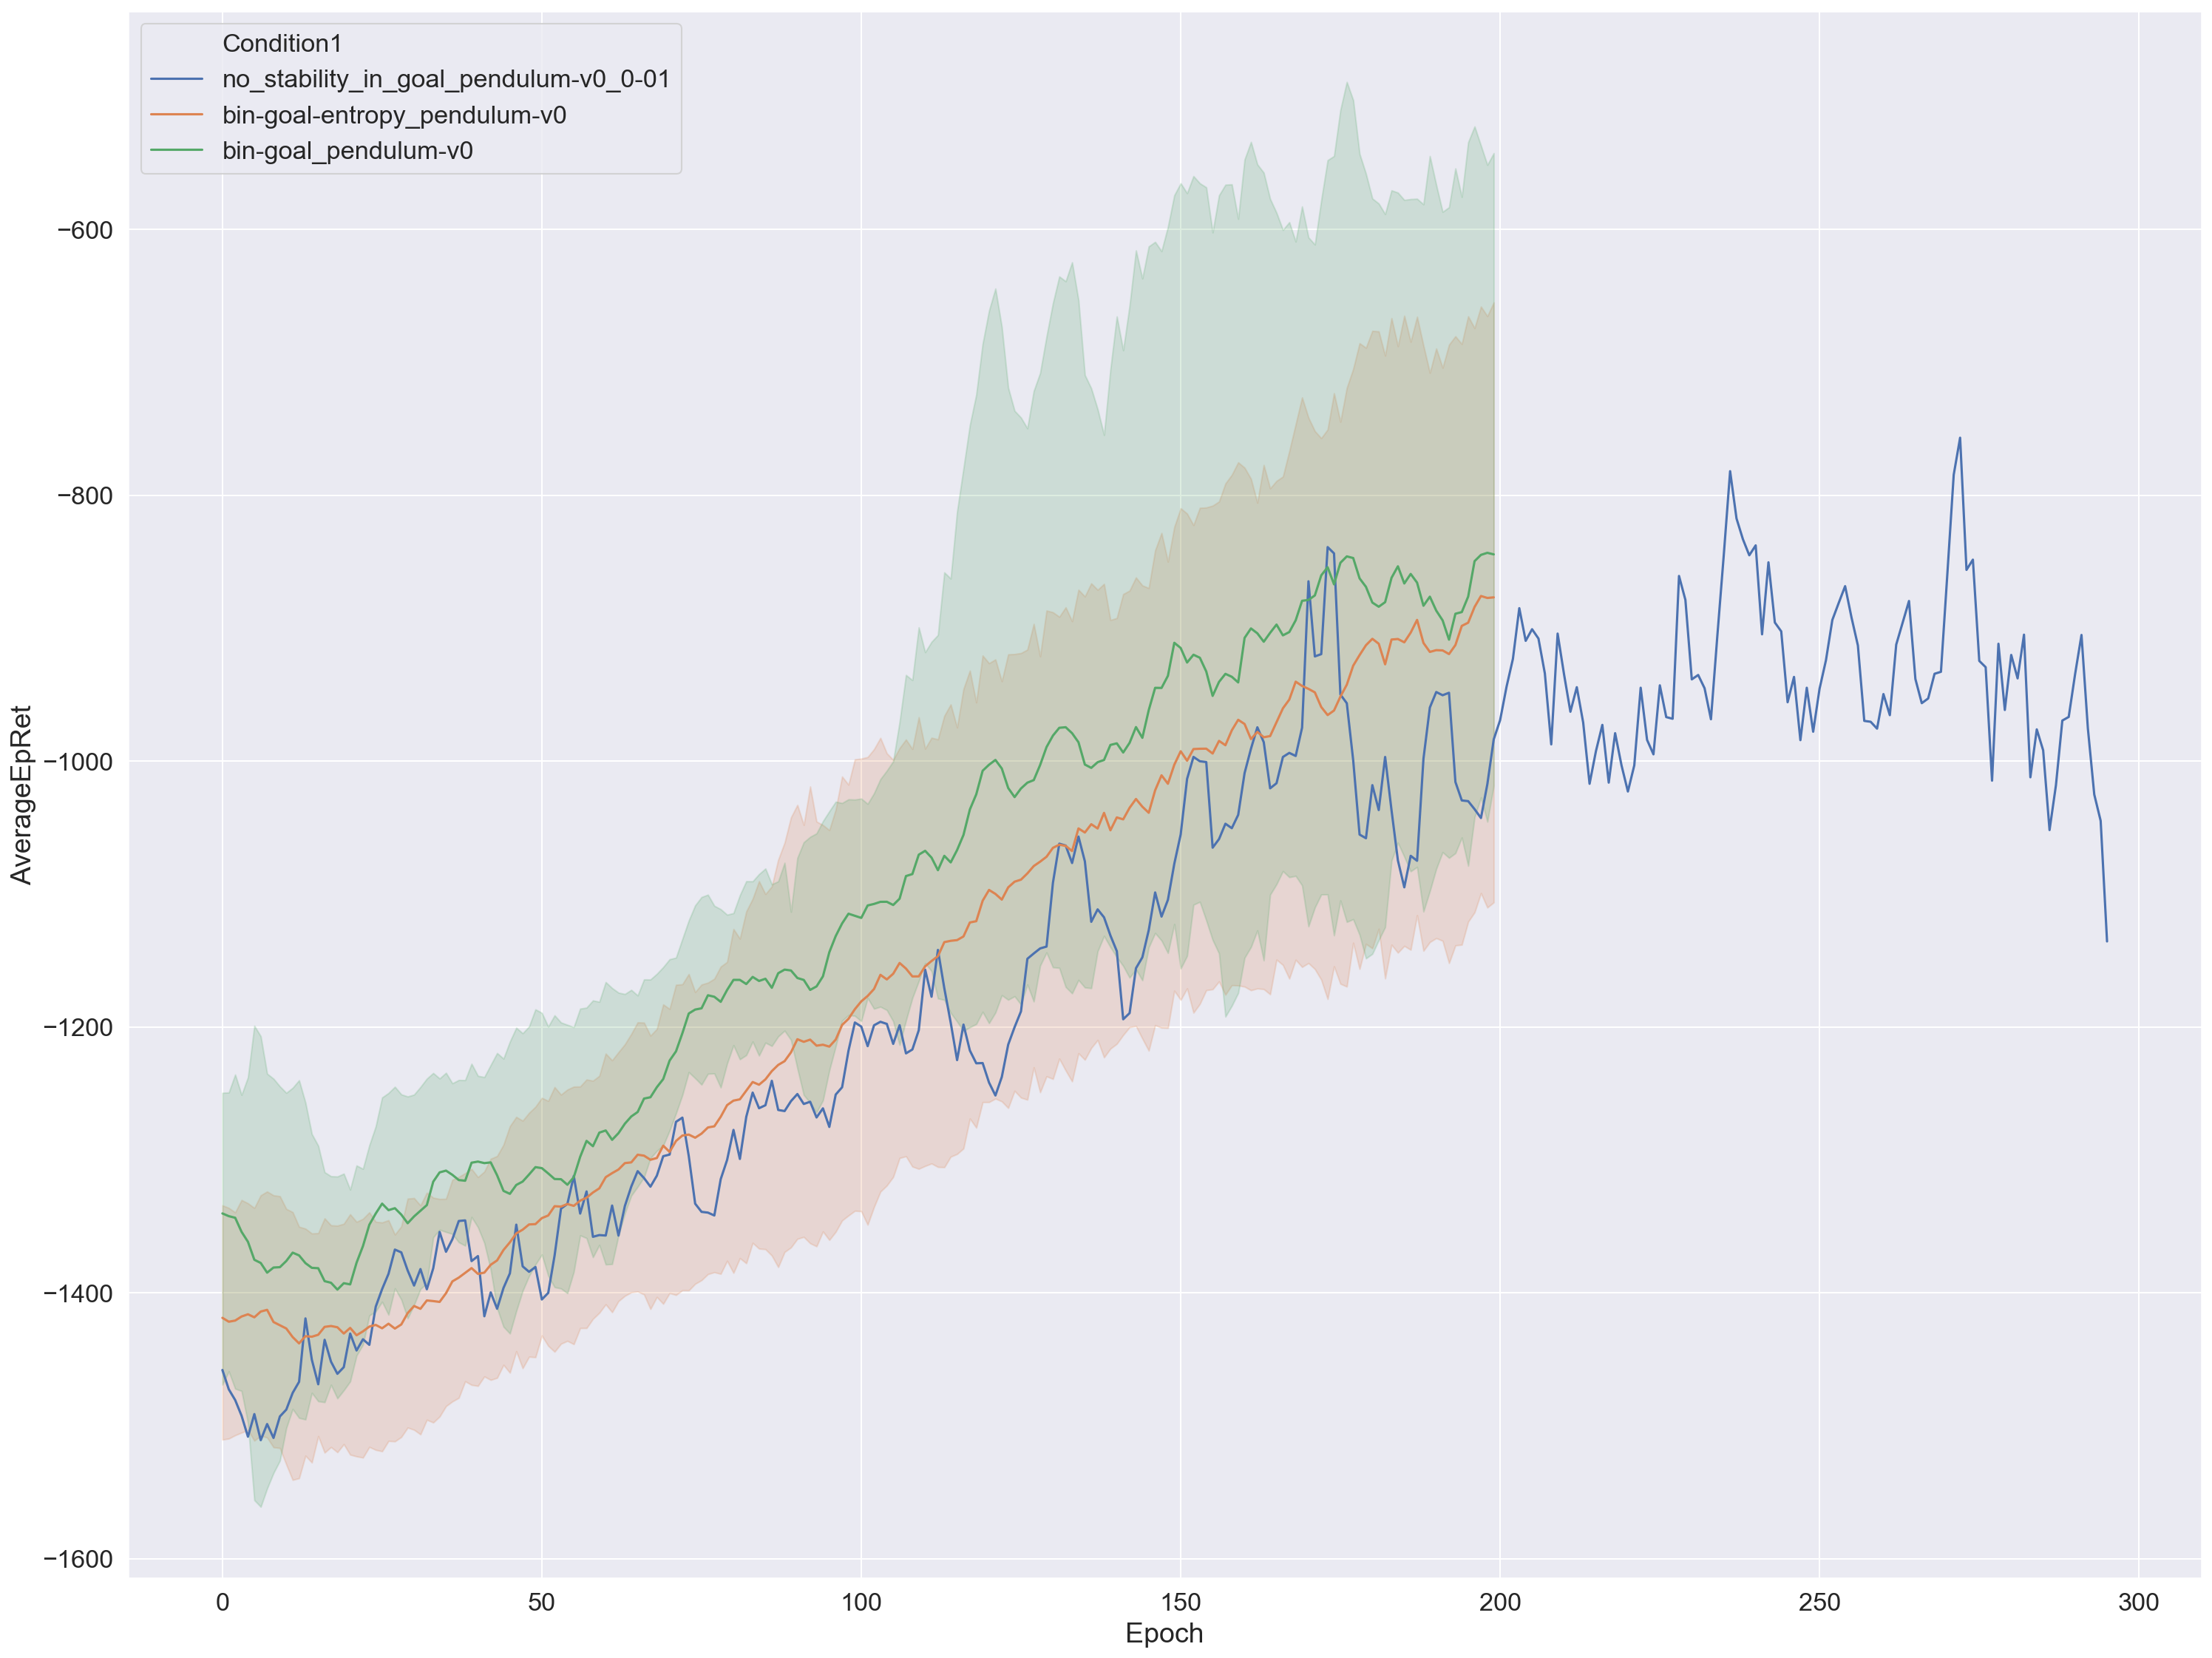

In [13]:
plt.figure(figsize=(20, 15), dpi=150)

# To show individual runs, add arguments: units='Condition2, estimator=None
# To compare runs with different epoch lengts, use:xaxis='TotalEnvInteracts'

plot_data(datasets, smooth=5)
plt.show()

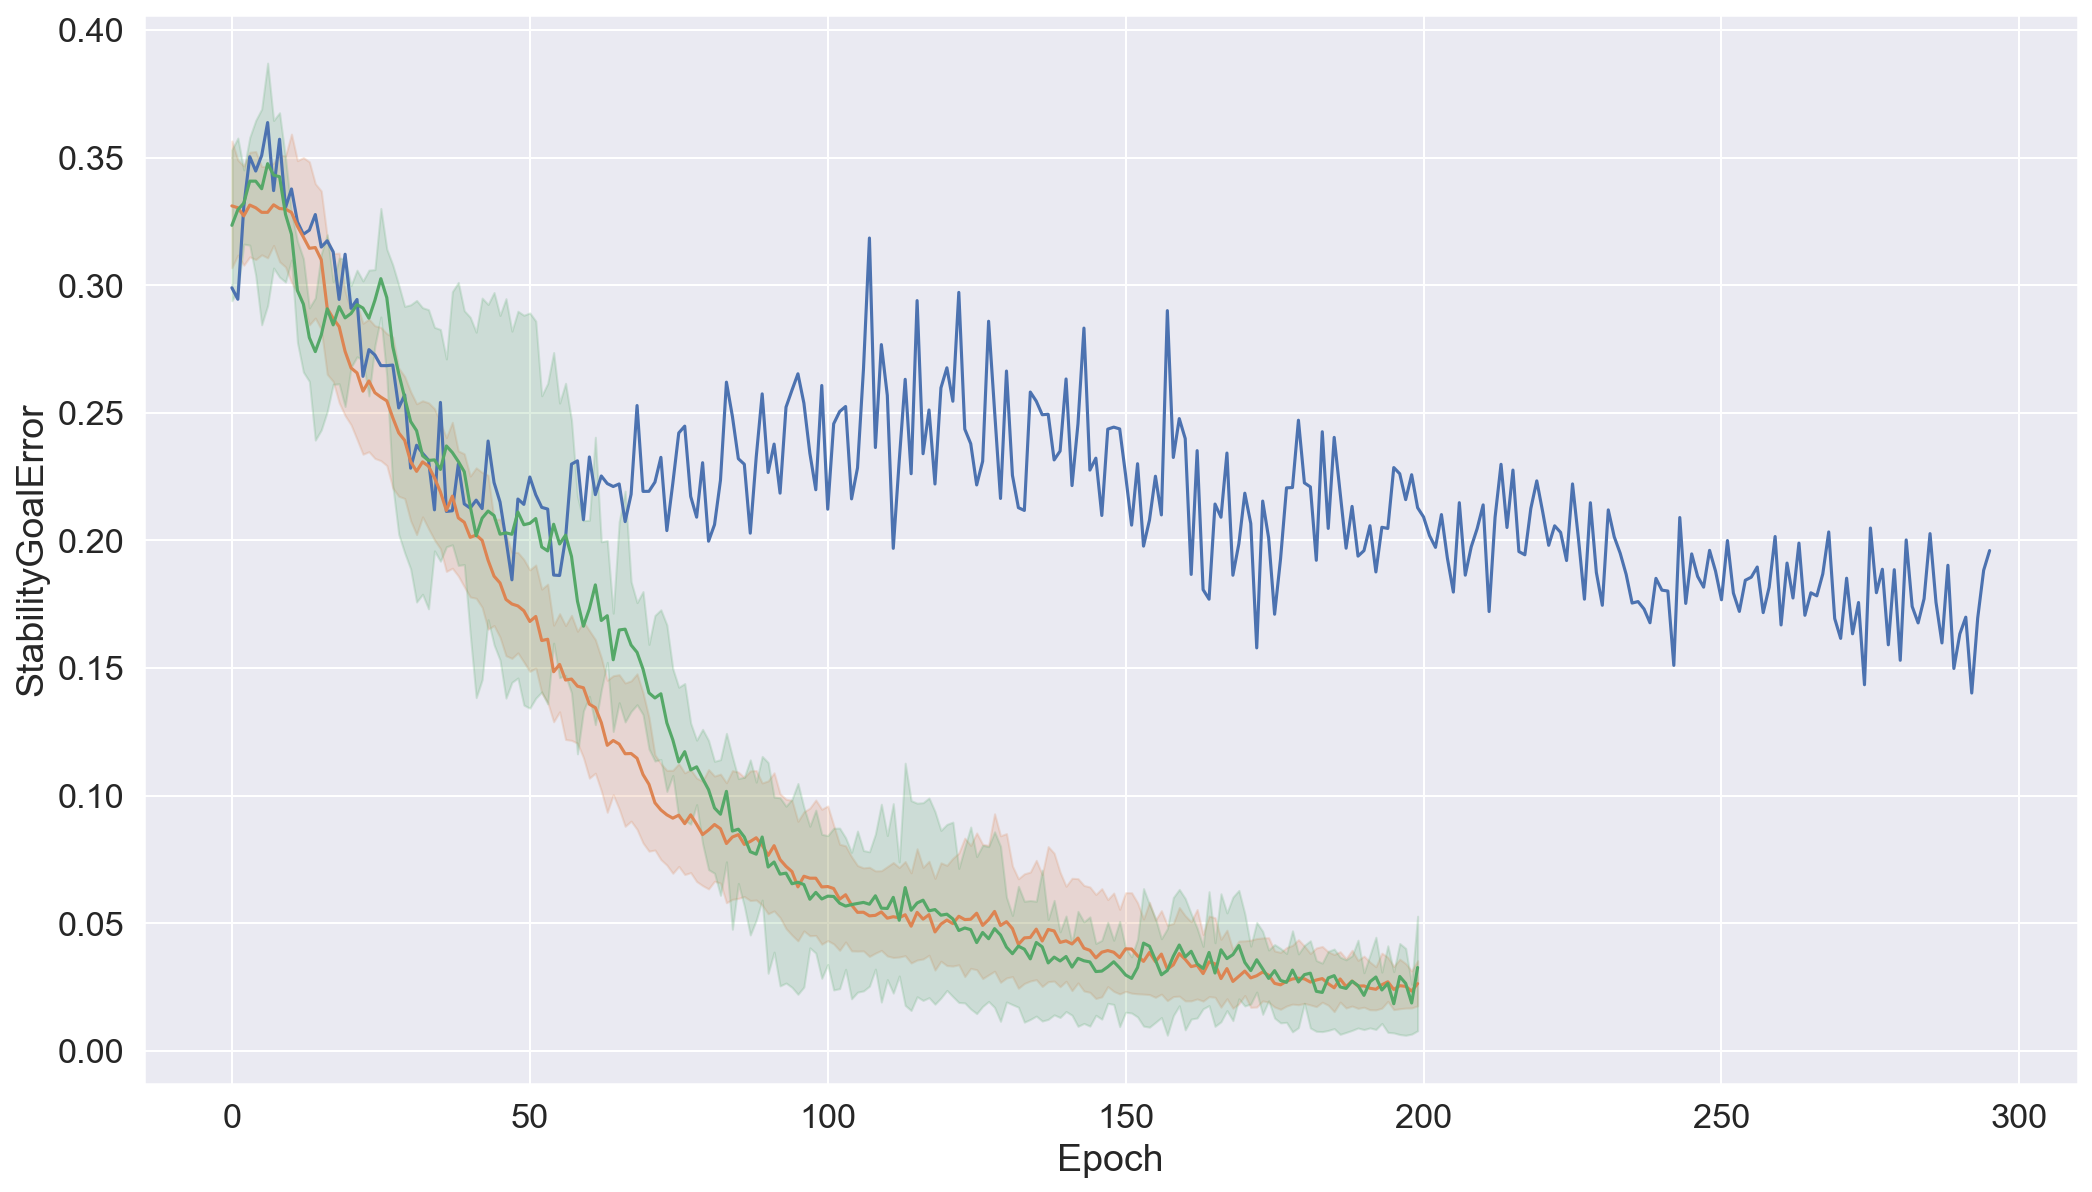

In [14]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='StabilityGoalError', smooth=1, show_legend=False, estimator='mean')
plt.show()

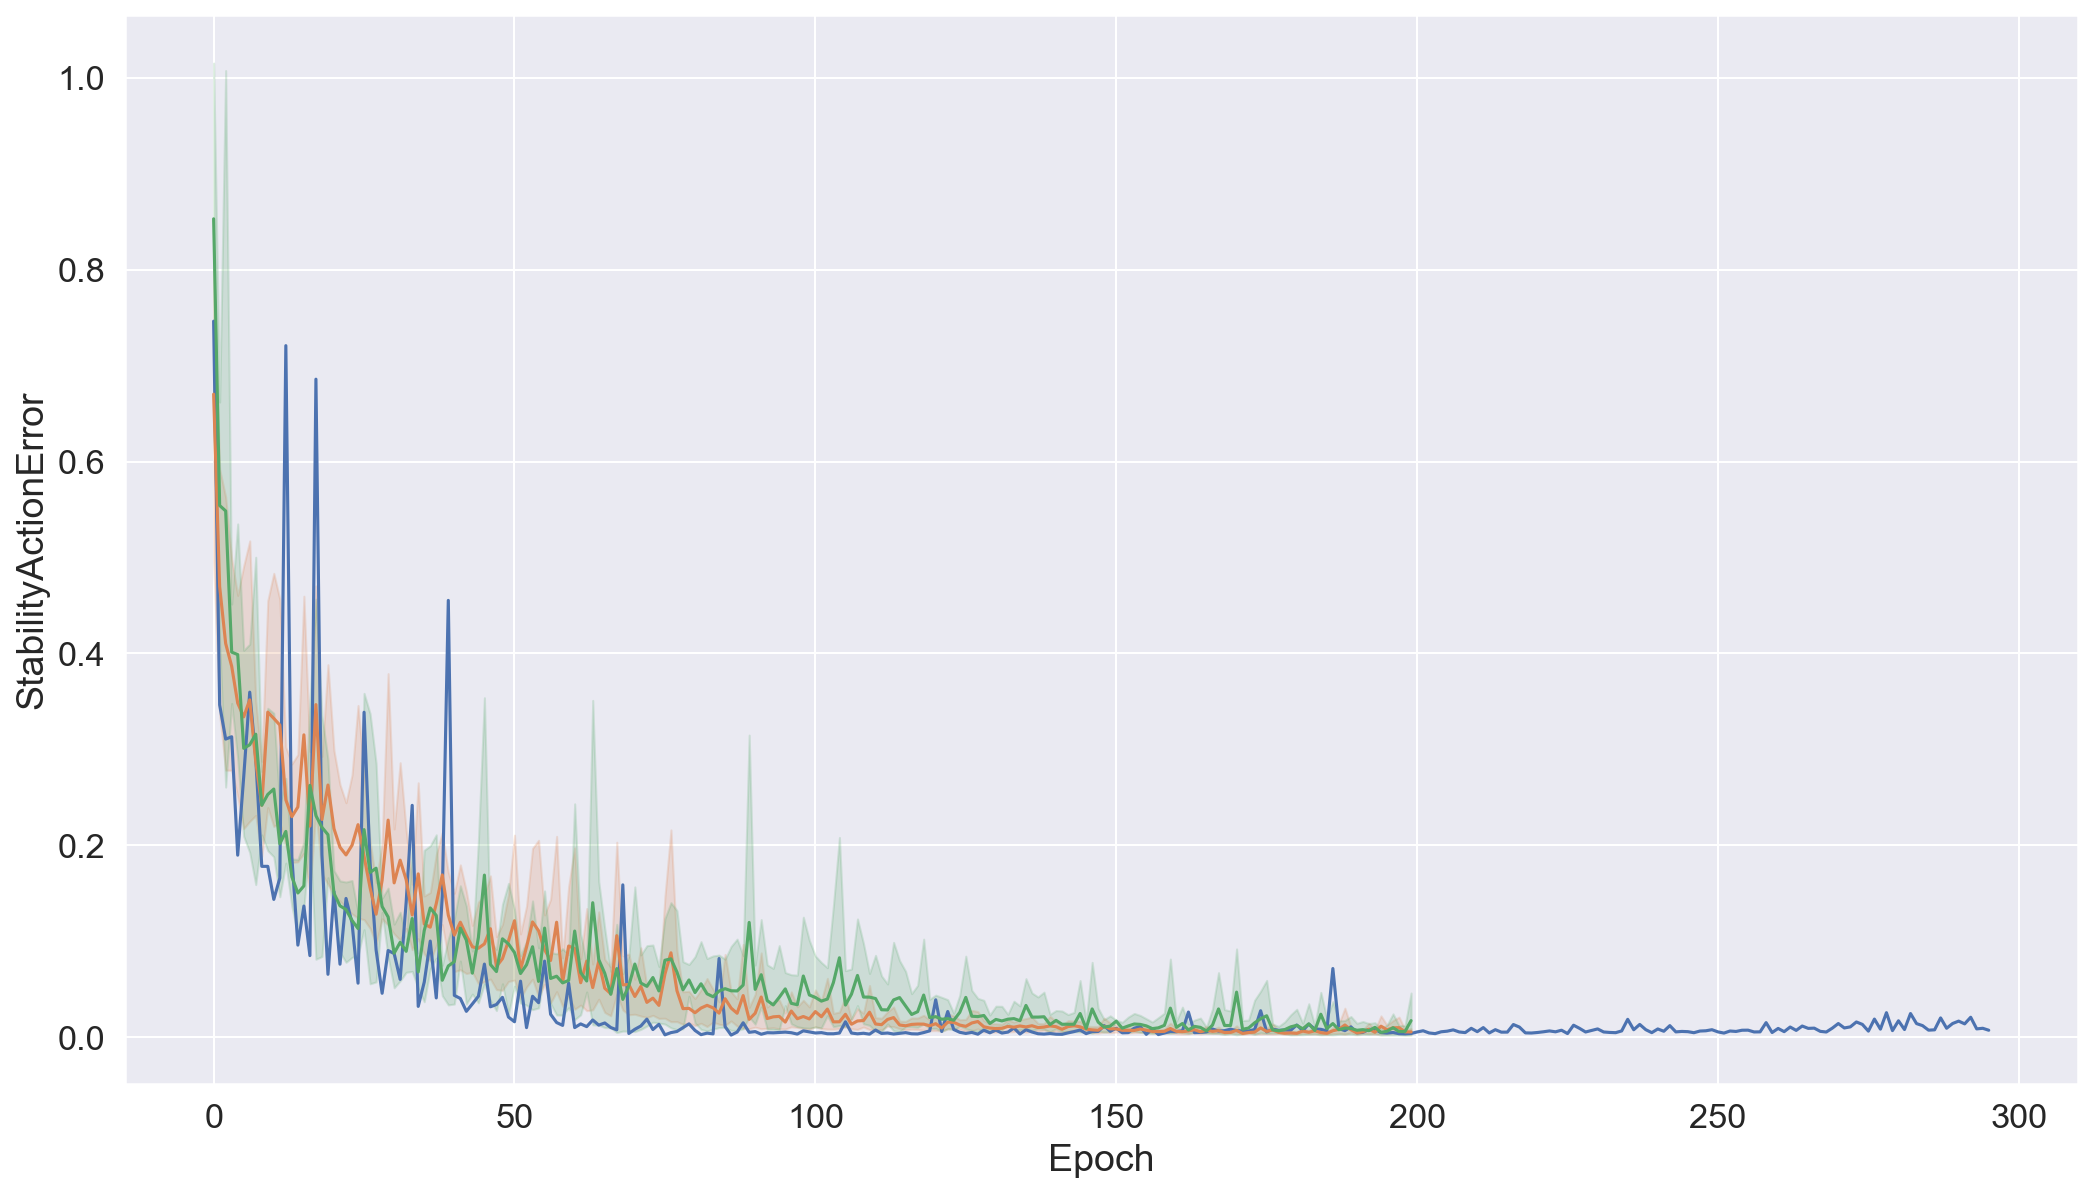

In [15]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='StabilityActionError', smooth=1, show_legend=False)
plt.show()

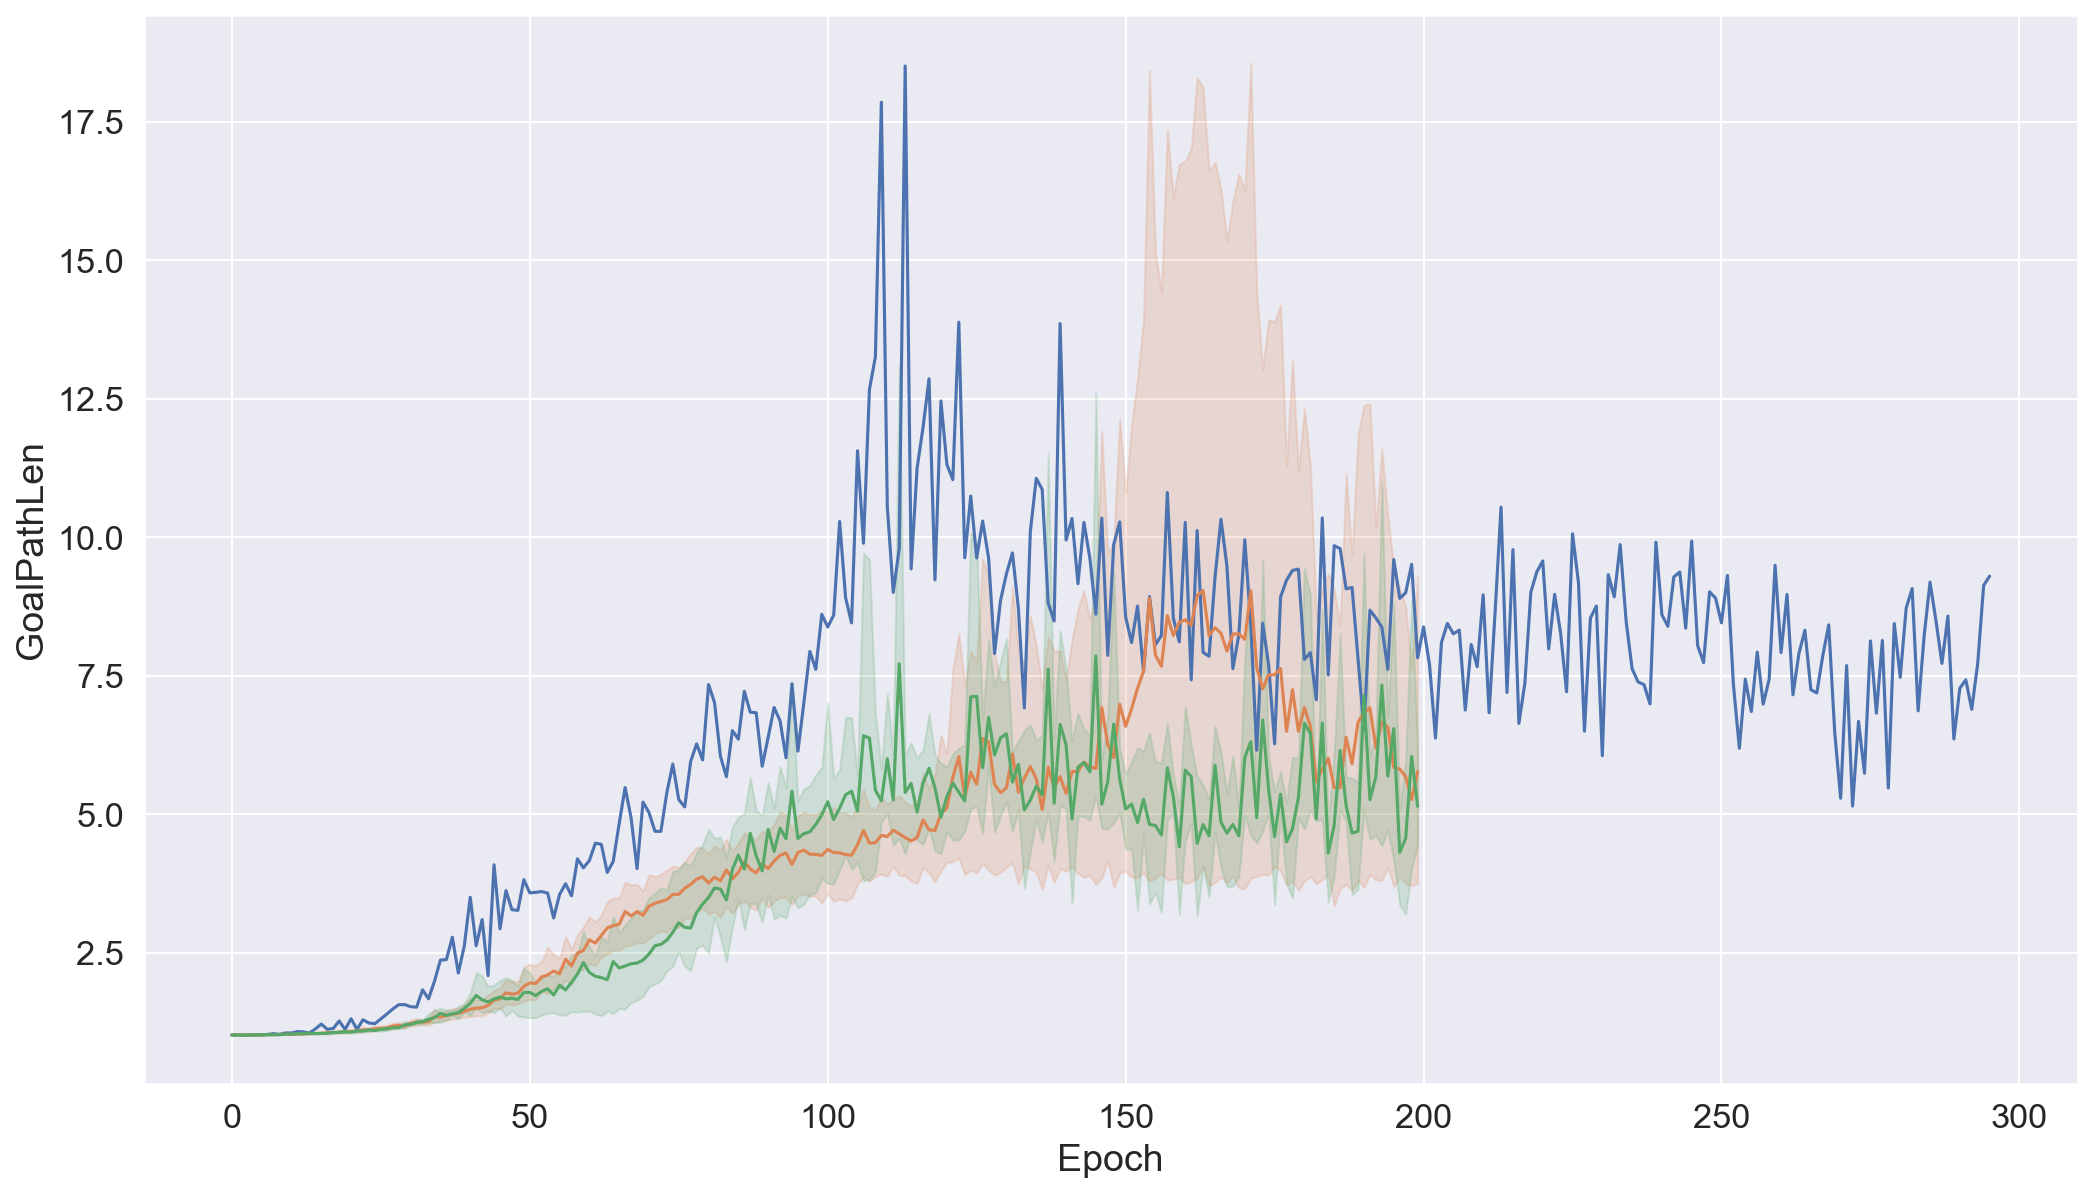

In [16]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalPathLen', smooth=1, show_legend=False)
plt.show()

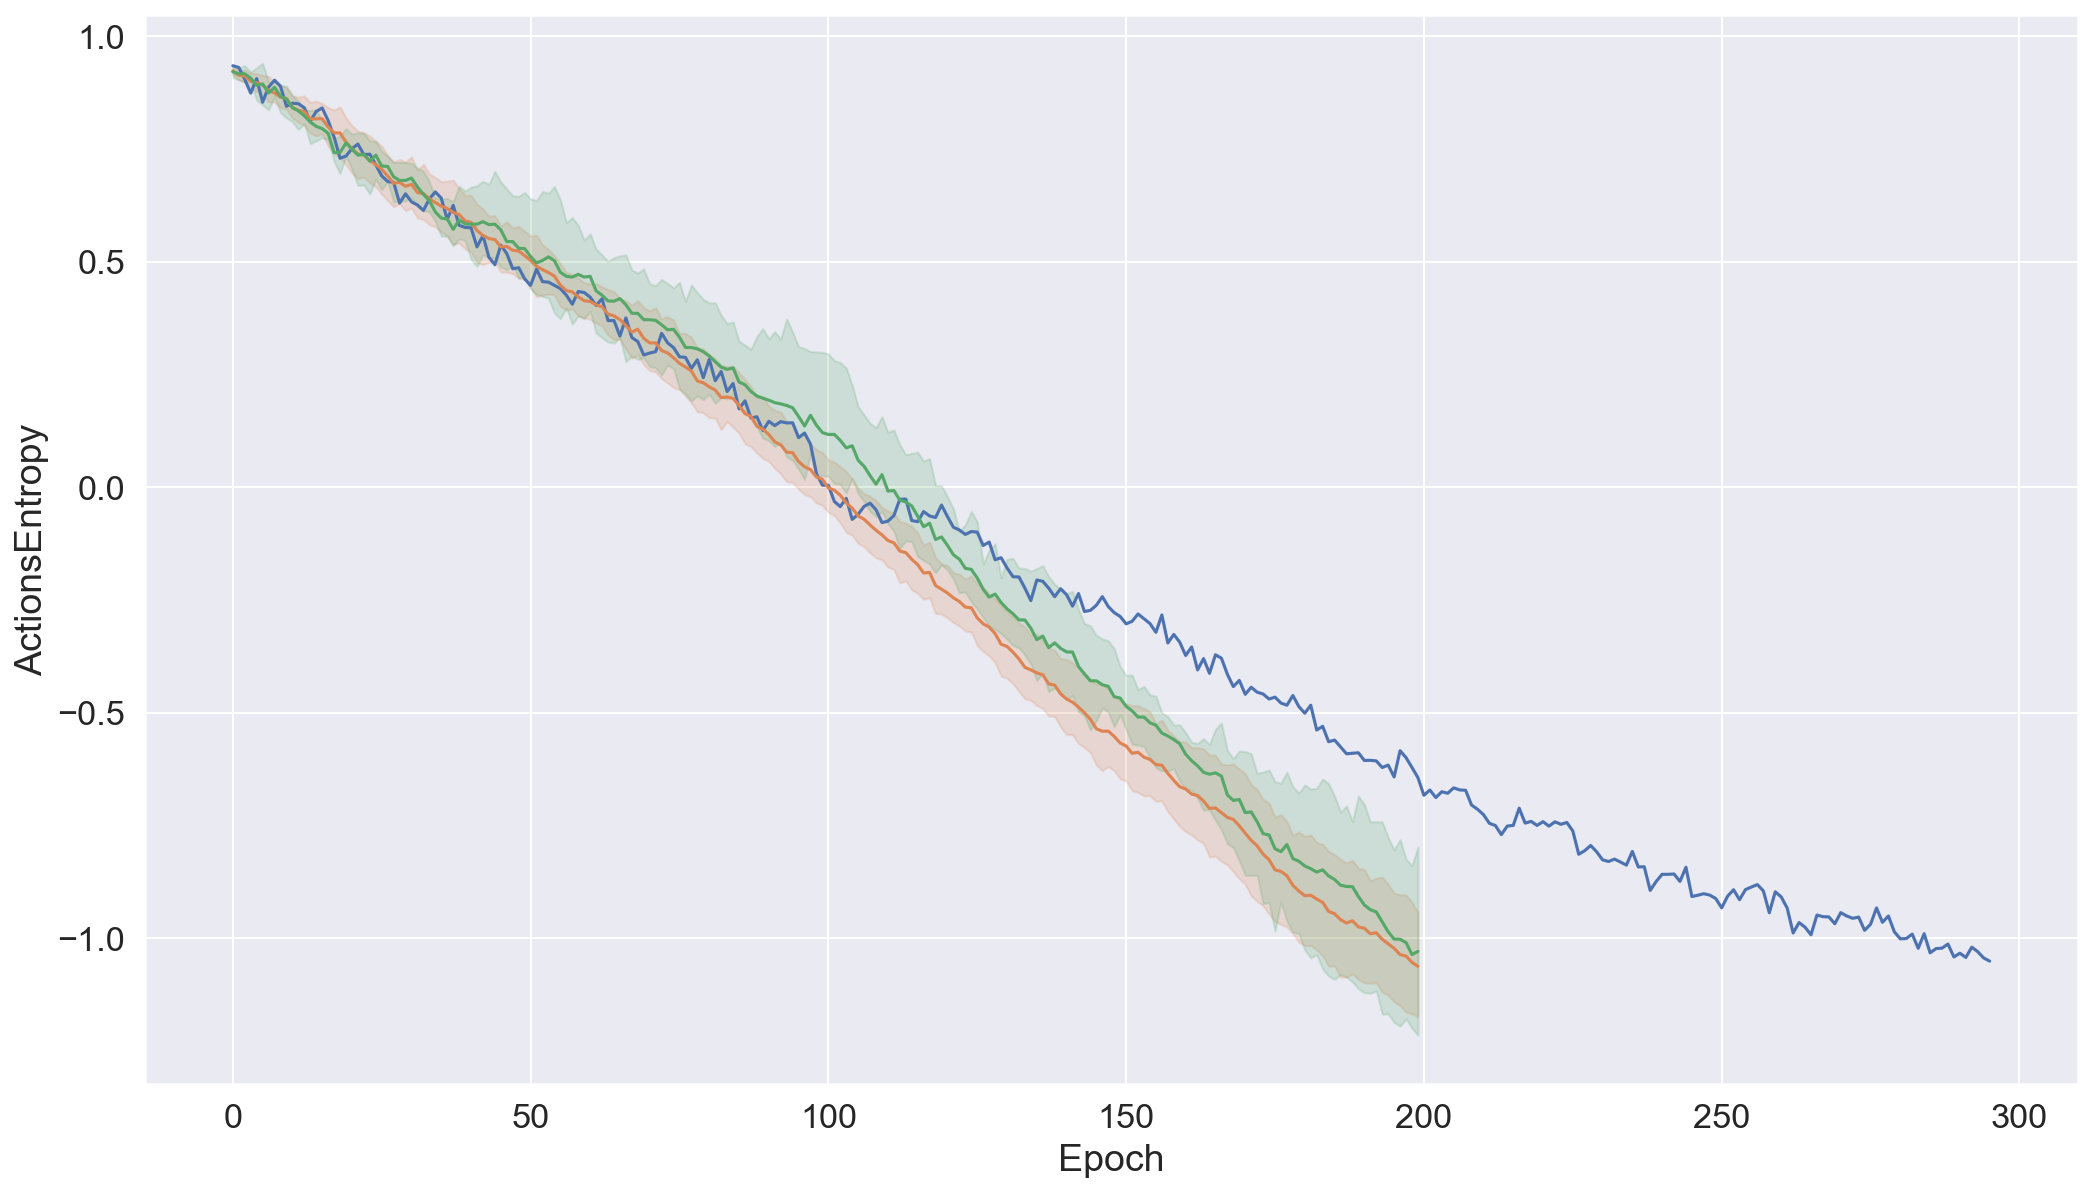

In [17]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='ActionsEntropy', smooth=1, show_legend=False)
plt.show()

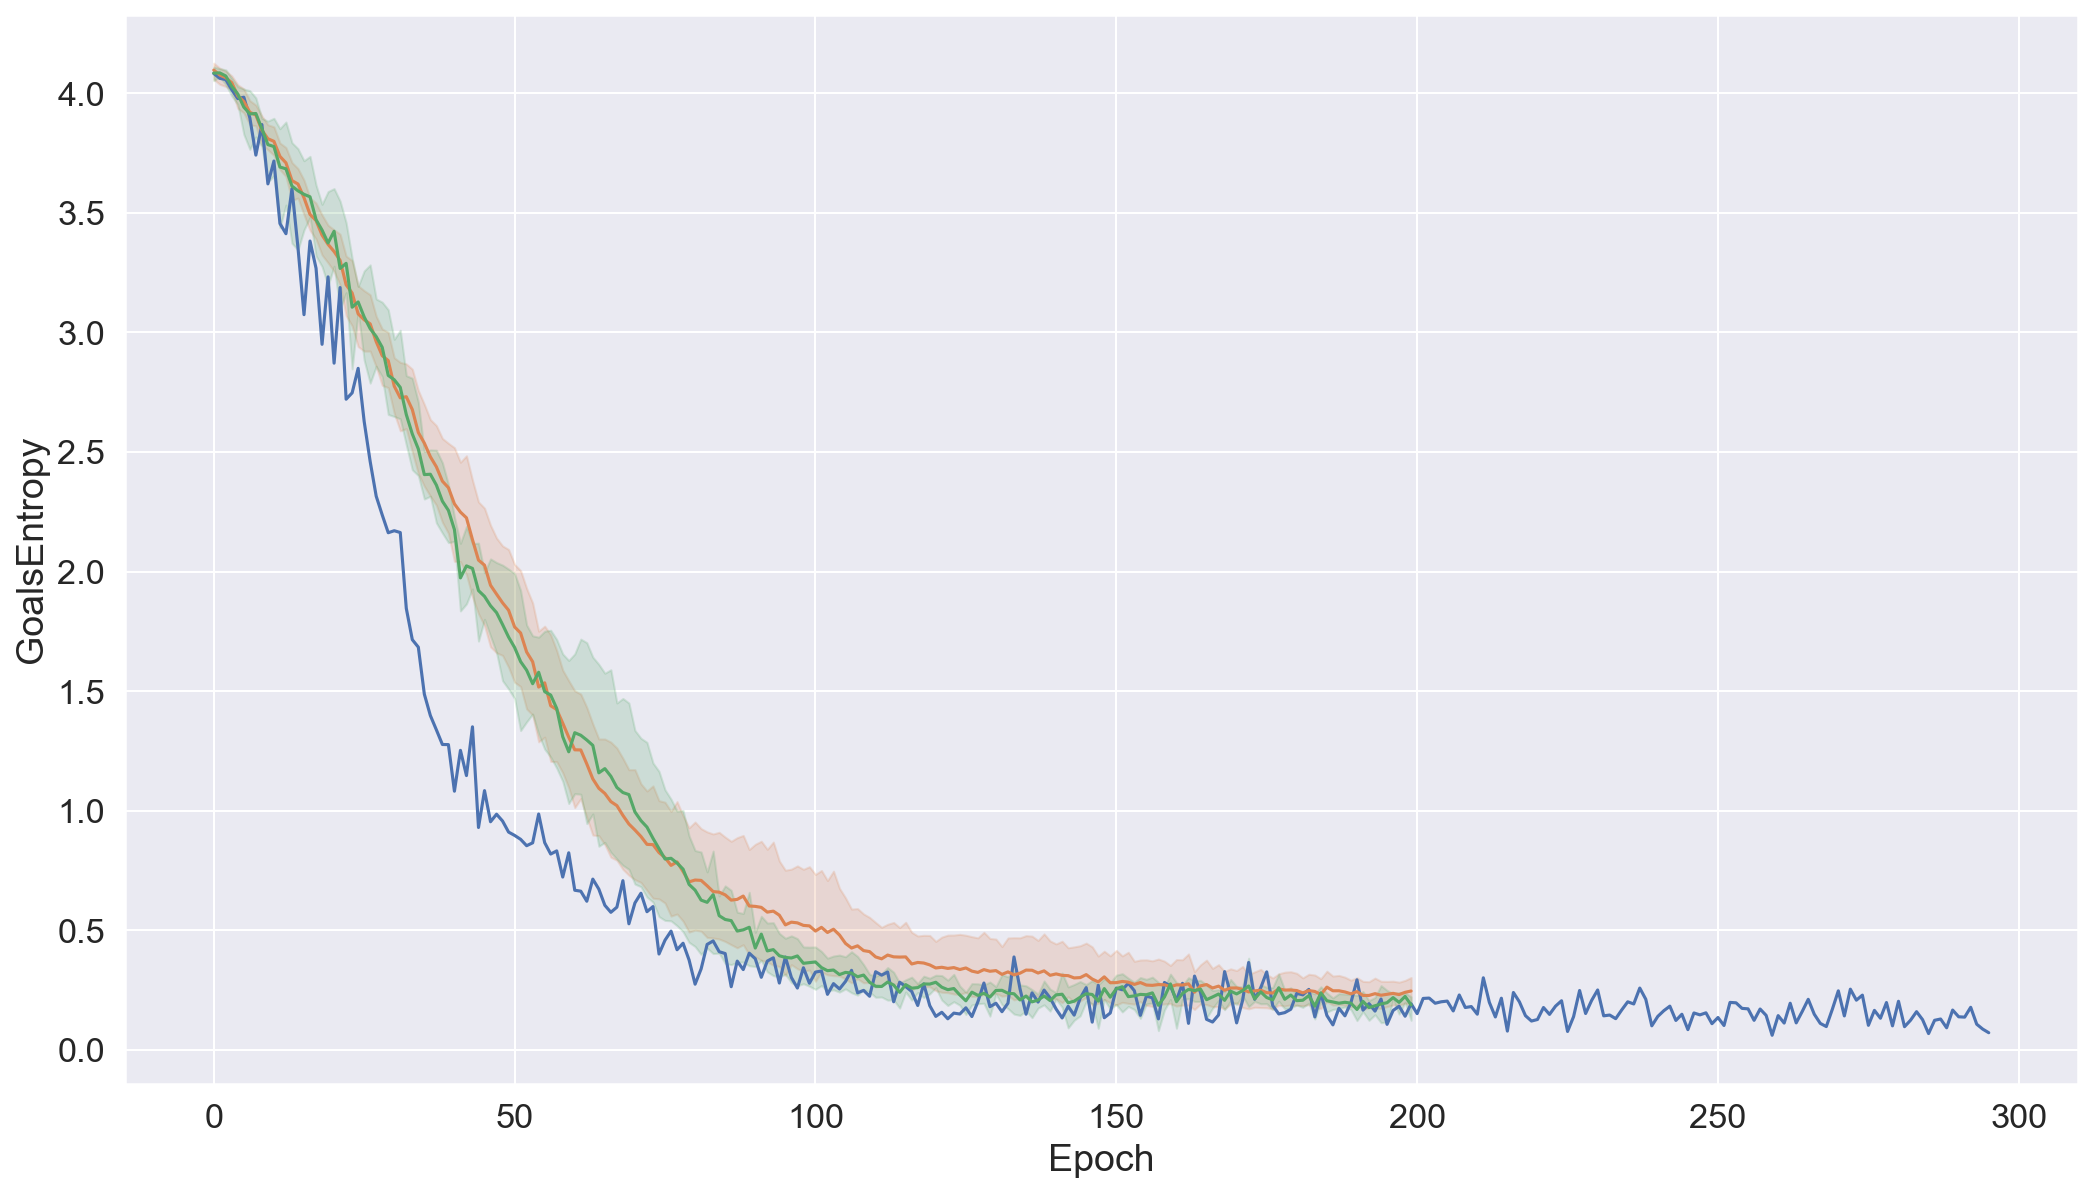

In [18]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalsEntropy', smooth=1, show_legend=False)
plt.show()

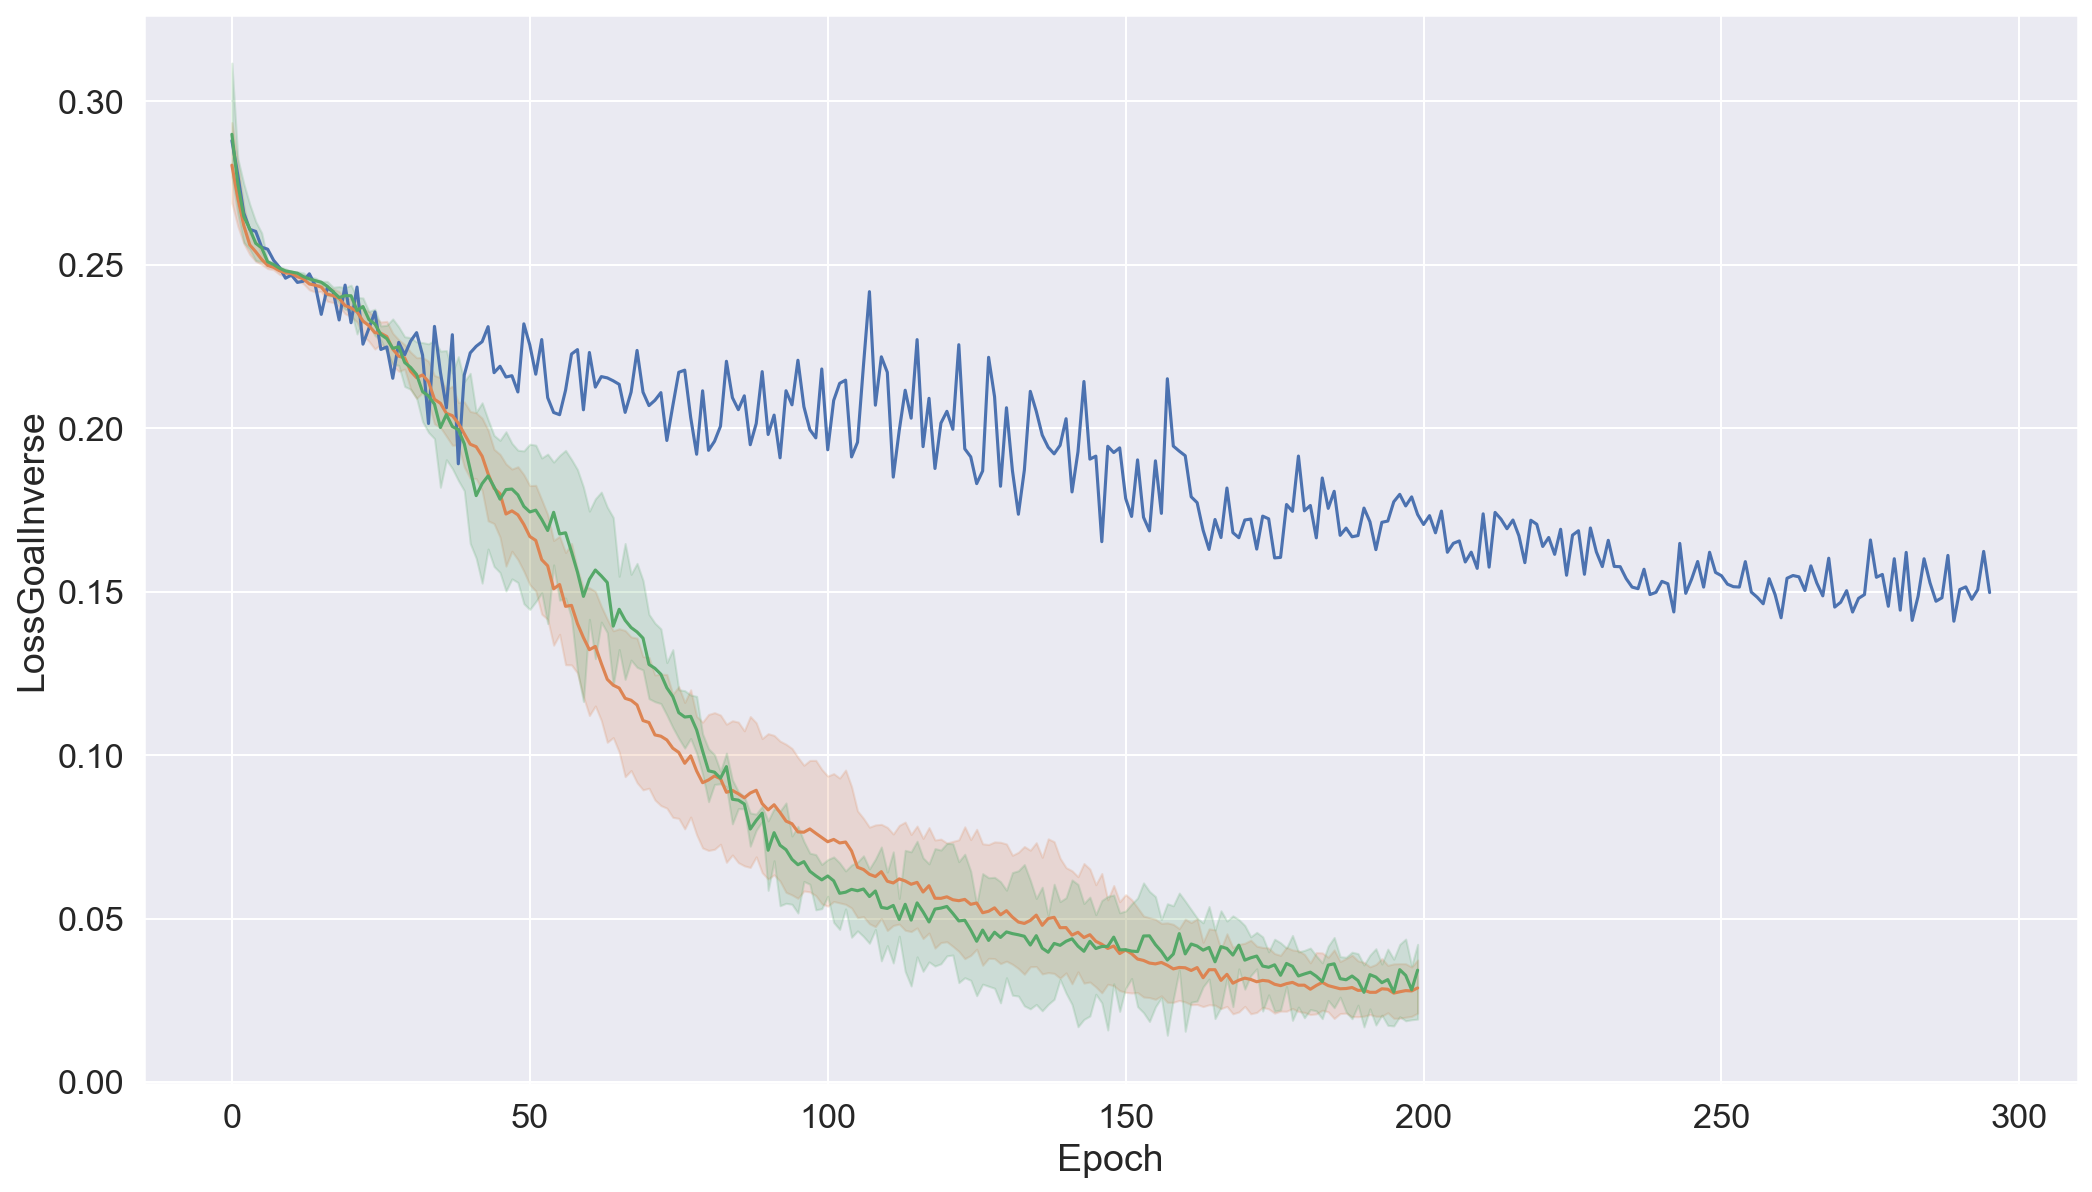

In [19]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='LossGoalInverse', smooth=1, show_legend=False)
plt.show()